<a href="https://colab.research.google.com/github/beifa/ML-models/blob/master/Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
from IPython.display import Image
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import pandas as pd
from scipy import optimize 
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
img1 = '/content/drive/My Drive/for_GitHub/learning_curves.jpg'
img2 = '/content/drive/My Drive/for_GitHub/bias_variance.jpg'

In [0]:
# img1 = '/image/learning_curves.jpg'
# img2 = '/image/bias_variance.jpg'

In [0]:
data = load_diabetes()
y = data.target
X = data.data

### Model

Cost function:
$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^m \left( h_{\theta}(x^{(i)}) - y^{(i)}\right)^2$$

$$ \theta_j = \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)}\right)x_j^{(i)} \qquad \text{simultaneously update } \theta_j \text{ for all } j$$

for my:

0. $$ h_\theta(x) = \theta^Tx = \theta_0 + \theta_1 x_1$$

1. $$h_\theta(x^{(i)}) - y^{(i)}$$

2. $$ (h_\theta(x^{(i)}) - y^{(i)}) * x_j^{(i)}$$

3. $$\sum_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)}\right)x_j^{(i)}$$

4. $$\theta_j - \alpha \frac{1}{m} $$



In [0]:
#we try make for only two features
def costfunc(X, y, theta):
  """
  Find cost func

  Param:
  -----
  X, y: data for model
  theta: values for lin regression param

  return: theta  
  """
  m = X.shape[0] # size all values
  # 0.
  h = np.dot(X, theta) #hypothesis(predict)
  # 1.
  J = 1/(2*m)*np.sum((h - y)**2)
  return J

def gradient(X, y, theta, alpha, num_iters):
  """
  find gradient (minimaize theta)
  
  Param:
  ------
  X, y:  data for model
  theta: values lr
  alpha: Learning rate - (скорорсть обучения или как быстро сходиться)
  num_iter: counts steps

  return: theta 
  """
  m = X.shape[0]     
  # make a copy of theta, which will be updated by gradient descent
  theta = theta.copy()
  J_history = []    
  for i in range(num_iters):
    #0. 1.
    h = np.dot(X, theta) - y
    #4.3.2
    theta = theta - 1/ m *alpha* X.T.dot(h)     
    J_history.append(costfunc(X, y, theta))   
  return theta, J_history

In [0]:
X_new = X[:, np.newaxis, 2][:50]
y_new = y[:50]

theta = np.zeros((X_new.shape[1]))
#computeCost(X, y, theta)
alpha = .1
num_iters = 10000
theta, grad = gradient(X_new, y_new, theta, alpha, num_iters)

### Test func

In [0]:
"""
find best(minimaize) theta with gradient and plot line

Take only one features and make split for test and train
"""
X_train, X_test = X[:, np.newaxis, 2][:-100], X[:, np.newaxis, 2][-100:]
y_train, y_test = y[:-100], y[-100:]
theta = np.zeros((X_train.shape[1]))
print(X_train.shape, X_test.shape)
print('_________________________')
print(y_train.shape, y_test.shape)
print(theta.shape)

(342, 1) (100, 1)
_________________________
(342,) (100,)
(1,)


In [0]:
#find theta
alpha = 1
num_iters = 10000
theta, _ = gradient(X_train, y_train, theta, alpha, num_iters)
#find predict
pred = np.mean(y_test) + np.dot(X_test, theta)

[933.75054857]


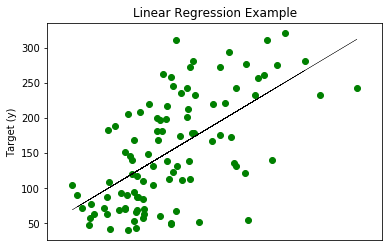

In [0]:
plt.scatter(X_test, y_test, color = 'g')
plt.plot(X_test, pred, 'k-', linewidth =.3)
plt.ylabel('Target (y)')
plt.xticks(())
plt.title('Linear Regression Example');
print(theta)

#### Check correct


[953.3606272]


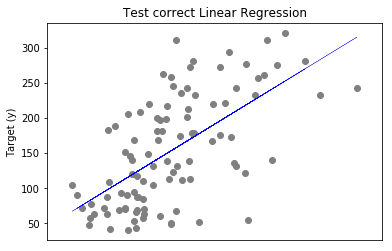

In [0]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
#plot
plt.scatter(X_test, y_test, color = 'gray')
plt.plot(X_test, lr_predict, 'b-', linewidth =.3)
plt.ylabel('Target (y)')
plt.xticks(())
plt.title('Test correct Linear Regression');
print(lr.coef_)

### Score

Коэффициент детерминации **R-квадрат** — это доля дисперсии зависимой переменной, объясняемая рассматриваемой моделью зависимости, то есть объясняющими переменными.

In [0]:
def scoreR2(y_true, y_pred):
  #coefficient R^2
  u = ((y_true - y_pred) ** 2).sum()
  v = ((y_true - y_true.mean()) ** 2).sum()
  r2 = 1 - (u / v)
  return r2

In [0]:
scoreR2(y_test, pred)

0.38042901420929953

In [0]:
from sklearn.metrics import r2_score
r2_score(y_test, lr_predict)

0.3804087960385918

### Curve Learning Rates

Theta:  933.7505288328689
Theta:  933.5994620522014
Theta:  921.5867309105574
Theta:  864.3135468032909
Theta:  540.3529293090044
Theta:  327.5271401302071
Theta:  77.25040541855893


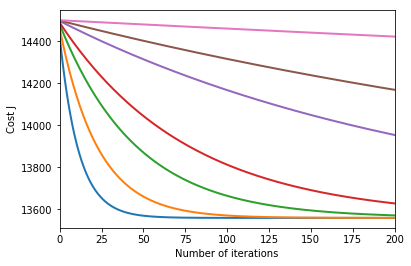

In [0]:
alphas = [20, 10, 5, 3, 1, 0.5, 0.1]
num_iters = 400

for a in alphas:
  theta = np.zeros((X_train.shape[1]))
  theta, J_history = gradient(X_train, y_train, theta, a, num_iters)
  print('Theta: ', theta[0])

  # Plot the convergence graph
  plt.plot(np.arange(len(J_history)), J_history, lw=2)
  plt.xlabel('Number of iterations')
  plt.ylabel('Cost J')
  plt.xlim(0, 200)

### Normal Equations

Использование этой формулы не требует какого-либо масштабирования объектов, и вы получите точное решение за один расчет: не существует «цикла до сходимости», как при градиентном спуске.


$$ \theta = \left( X^T X\right)^{-1} X^T\vec{y}$$

In [0]:
def normalEqn(X, y):
    """
    linear regression using the normal equations.
    
    Param:
    ------
    X, y :dataset    
    Returns: theta         
    """
    theta = np.zeros(X.shape[1])    
    inv = np.linalg.pinv(np.dot(X.T, X)) #inverse matrix
    theta = np.dot(inv, np.dot(X.T, y))    
    return theta

In [0]:
normalEqn(X_train, y_train)

array([933.75054895])

Check for all data

In [0]:
normalEqn(X, y)

array([ -10.01219782, -239.81908937,  519.83978679,  324.39042769,
       -792.18416163,  476.74583782,  101.04457032,  177.06417623,
        751.27932109,   67.62538639])

In [0]:
lr = LinearRegression()
lr.fit(X, y)
lr.coef_

array([ -10.01219782, -239.81908937,  519.83978679,  324.39042769,
       -792.18416163,  476.74583782,  101.04457032,  177.06417623,
        751.27932109,   67.62538639])

### Everything is simple Step-by-step

In [0]:
data = np.array([[34,108, 64, 88, 99,51],[5,17,11,8,14,5]]).T
df = pd.DataFrame(data, columns=('x', 'y'))
df.head()

,x,y
0,34,5
1,108,17
2,64,11
3,88,8
4,99,14


In [0]:
xmean, ymean = df.mean()

Мы предсказываем у.

Сумма квадратов :

$min\sum (y_i - \hat{y_i)} ^ 2$


1. $\hat{y} = b_0 + b_1 x$

  $b_1 = \frac{\sum(x_i - \overline{x_i})* \sum(y_i - \overline{y_i})}{\sum(x_i - \overline{x_i}) ^ 2}$

  $b_0 = \overline{y} - b_1\overline{x}$
    
2. Center  $\overline{x}, \overline{y} = (74, 10) $

3. Calculate $\hat{y}$

4. SSE, SST, SSR

5. Coef.Determination = $r ^2$ = $\frac{SSR}{SST}$
    
    

In [0]:
df['x-xmean'] = df.x - xmean
df['y-ymean'] = df.y - ymean
df['(x-xmean)(y-ymean)'] = (df.x - xmean) * (df.y - ymean)
df['(x-xmean)** 2'] = (df.x - xmean) ** 2

,x,y,x-xmean,y-ymean,(x-xmean)(y-ymean),(x-xmean)** 2
0,34,5,-40.0,-5.0,200.0,1600.0
1,108,17,34.0,7.0,238.0,1156.0
2,64,11,-10.0,1.0,-10.0,100.0
3,88,8,14.0,-2.0,-28.0,196.0
4,99,14,25.0,4.0,100.0,625.0


In [0]:
#calculate sum 
b_1 = df['(x-xmean)(y-ymean)'].sum() / df['(x-xmean)** 2'].sum() # 0.1462
b_0 = ymean - b_1 * xmean # -0.8202

In [0]:
df['y_predicted'] = b_0 + b_1 * df.x

In [0]:
df['error'] = (df.y - df['y_predicted']) ** 2

In [0]:
df.head()

,x,y,x-xmean,y-ymean,(x-xmean)(y-ymean),(x-xmean)** 2,y_predicted,error
0,34,5,-40.0,-5.0,200.0,1600.0,4.151213,0.720440
1,108,17,34.0,7.0,238.0,1156.0,14.971469,4.114937
2,64,11,-10.0,1.0,-10.0,100.0,8.537803,6.062413
3,88,8,14.0,-2.0,-28.0,196.0,12.047076,16.378821
4,99,14,25.0,4.0,100.0,625.0,13.655492,0.118686


Text(0, 0.5, 'Axis Y')

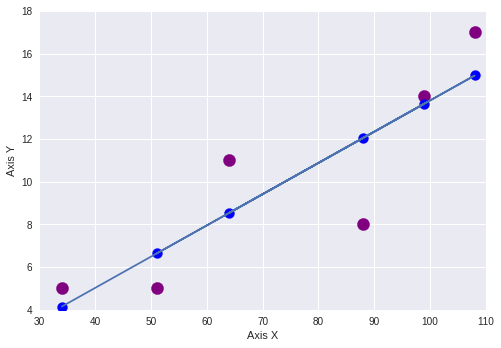

In [0]:
plt.scatter(df.x, df.y, s = 150, c = 'purple')# data
plt.scatter(df.x, df['y_predicted'], marker = 'o', s = 100, c = 'b') #predict
plt.plot(df.x, df['y_predicted'])#line regression
plt.xlim(30, 110)
plt.ylim(4, 18)
plt.xlabel('Axis X')
plt.ylabel('Axis Y')

In [0]:
sse = df.error.sum() #30.07489
sst = ((df.y - ymean) ** 2).sum() # 120
ssr = sst - sse #89.925

In [0]:
coef_determination = ssr/ sst
predict = coef_determination * 100
predict

74.93758915834522

### Regularized linear regression

Regularized cost function:

$$ J(\theta) = \frac{1}{2m} \left( \sum_{i=1}^m \left( h_\theta\left( x^{(i)} \right) - y^{(i)} \right)^2 \right) + \frac{\lambda}{2m} \left( \sum_{j=1}^n \theta_j^2 \right)$$

grad:

$$
\begin{align}
& \frac{\partial J(\theta)}{\partial \theta_0} = \frac{1}{m} \sum_{i=1}^m \left( h_\theta \left(x^{(i)} \right) - y^{(i)} \right) x_j^{(i)} & \qquad \text{for } j = 0 \\
& \frac{\partial J(\theta)}{\partial \theta_j} = \left( \frac{1}{m} \sum_{i=1}^m \left( h_\theta \left( x^{(i)} \right) - y^{(i)} \right) x_j^{(i)} \right) + \frac{\lambda}{m} \theta_j & \qquad \text{for } j \ge 1
\end{align}
$$

In [0]:
m, n = X.shape
X = np.concatenate([np.ones((m, 1)), X], axis=1)

In [0]:
def regcost(theta, X, y,lambda_=0):
  """
  Cost func with regularize(lambda_)

  Param:
  ------
  X, y: array, data
  theta: array, param for lineregression
  """
  m = y.size 
  h = X.dot(theta.T)
  cost = 1/ (2* m) * np.sum((h- y)**2 )
  reg = lambda_ /(2 *m)* np.sum(np.square(theta[1:]))
  J = cost + reg   
  return J

In [0]:
def grad(theta, X, y, lambda_=0.0):
  """
  Make gradient, minimaize theta  
  """   
  h = np.dot(X, theta.T)  
  grad = 1/m * X.T.dot(h-y) + 1* lambda_/m * np.r_[[0], theta[1:]]
  return grad

In [0]:
def cost_optimize(fn, X, y, lambda_=0.0):
  """
  Minimization of scalar function of one or more variables.

  Param:
  ------
  fn: name cost func
  X, y: array, data
  lambda_: regularize  
  """
  theta = np.zeros((X.shape[1], 1))
  options = {'maxiter': 200}
  res = optimize.minimize(fn, theta, args = (X, y, lambda_), method = 'TNC', jac = grad, options=options)
  return res.x

cost_optimize(regcost, X, y, lambda_=0.0)

array([ 152.13348362,  -10.01190702, -239.81750442,  519.84085486,
        324.38916205, -792.09146346,  476.67104045,  101.0043444 ,
        177.05285101,  751.24502927,   67.62524082])

###  Polynomial regression

Выбор данных для работы был спонтанным и он (я так думаю, не совсем подходит для понимания поли регрессии, мы просто сгенерируем данные которые больше подойдут для наглядности, тем не мение  после добавления  поли мы можем увидеть результат для обоих датасетов.

The choice of data for work was spontaneous and it (I think that is not quite suitable for understanding poly regression, we just generate data that is more suitable for clarity, however, after adding poly we can see the result for both datasets.


#### Add new data

In [0]:
from sklearn.datasets import make_regression

X, y = make_regression(10, 1, 1, noise= 5, random_state=1)

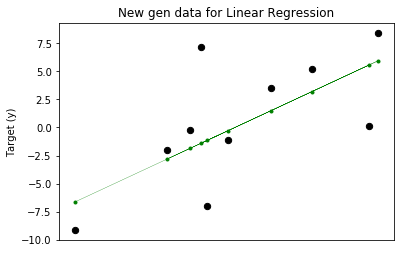

In [0]:
Xx = np.concatenate((np.ones((X.shape[0], 1)), X), axis = 1) # only for plot
theta = cost_optimize(regcost, Xx, y, lambda_=0.0)
pred = np.mean(y) + np.dot(Xx[:, 1], theta[1])
plt.scatter(Xx[:, 1], y, s = 40, c = 'k')
plt.plot(Xx[:, 1], pred, 'g.-', linewidth =.3)
plt.ylabel('Target (y)')
plt.xticks(())
plt.title('New gen data for Linear Regression');

In [0]:
scoreR2(y, pred)

0.45579278400424095

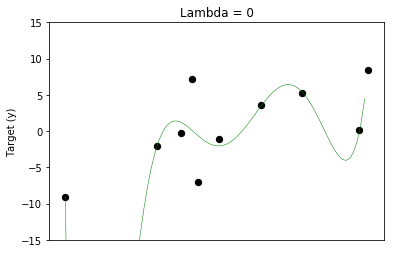

In [0]:
def poly(X, p):
  """
  only for one features

  The problem with our linear model was that it was too simple for the data and resulted in underfitting (high bias)
  add more features
  """
  X_poly = np.zeros((X.shape[0], p))
  for sq in range(1, p+1):      
    poly_data = X **sq    
    X_poly[:, sq-1] = poly_data.ravel()
  return X_poly

def norm(X_poly):
  """
  Normalize data
  return: mean, std, X_polywith normalize
  """
  mu = X_poly.mean(axis = 0)
  std = X_poly.std(axis = 0, ddof = 1)
  X_poly_norm = (X_poly - mu) / std
  return mu, std, X_poly_norm


def i_ploting(X, y, p, theta, mu, std):
  """
  для отрисовки кривой мы строим линию мин, макс по Х,
  затем применяем поли, норм, доб. интерцепт
  важно тета, среднее и стд от norm(X_poly)

  Param:
  ------
  X,y: array, data
  p: int,  degrees poly
  theta: array, minimize param after minimize func
  mu: float, mean func(norm(X_poly))
  std: float, std func(norm(X_poly))
  """
  #gen data for plot x
  x = np.arange(X.min(), X.max(), 0.05)
  #make poly model x
  X_poly = poly(x, p)
  #normalize
  X_poly -= mu
  X_poly /= std
  #intercept
  X_poly = np.c_[np.ones((X_poly.shape[0])), X_poly]
  #ploty
  pred = np.dot(X_poly, theta)
  plt.scatter(X, y, s = 40, c = 'k')
  plt.plot(x, pred, 'g', lw=.5)
  plt.ylabel('Target (y)')
  plt.xticks(());

p=8
X_poly = poly(X, 8)
mu, std, X_poly_norm = norm(X_poly)
#add intercept after norm
X_poly_norm = np.c_[np.ones((X_poly_norm.shape[0])), X_poly_norm]                           
theta = cost_optimize(regcost, X_poly_norm, y, lambda_=0)
i_ploting(X, y, p, theta, mu, std)
plt.ylim(-15, 15)
plt.title('Lambda = 0');

In [0]:
pred = np.dot(X_poly_norm, theta)
scoreR2(y, pred)

0.6858816137970618

Score with poly rise to 0.68 compared no poly 0.45

In [0]:
m,n = X_poly_norm.shape
X_train, X_test, y_train, y_test = train_test_split(X_poly_norm, y, test_size=0.33, random_state=2)

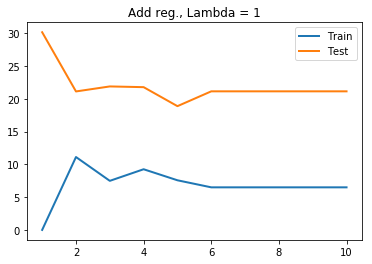

In [0]:
#plot learnig curves
error_train = np.zeros(m)
error_val   = np.zeros(m)

for i in range(y.size):
  theta = cost_optimize(regcost,  X_train[:i+1], y_train[:i+1], lambda_=1)
  error_train[i] = regcost(theta, X_train[:i+1], y_train[:i+1], lambda_=1)
  error_val[i] = regcost(theta, X_test, y_test, lambda_=1)

plt.plot(np.arange(1, m+1), error_train, np.arange(1, m+1), error_val, lw=2)
plt.title('Add reg., Lambda = 1')
plt.legend(['Train', 'Test']);

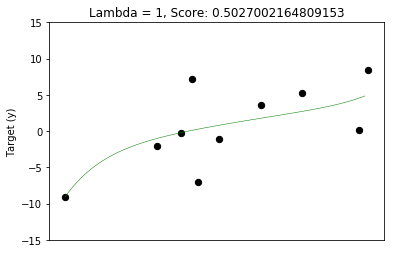

In [0]:
#lambda = 1
p=8
X_poly = poly(X, 8)
mu, std, X_poly_norm = norm(X_poly)
#add intercept after norm
X_poly_norm = np.c_[np.ones((X_poly_norm.shape[0])), X_poly_norm]                           
theta = cost_optimize(regcost, X_poly_norm, y, lambda_=1)
pred = np.dot(X_poly_norm, theta)
i_plotyng(X, y, p, theta, mu, std)
plt.ylim(-15, 15)
plt.title('Lambda = 1, Score: '+  str(scoreR2(y, pred)));

### Learning Curves

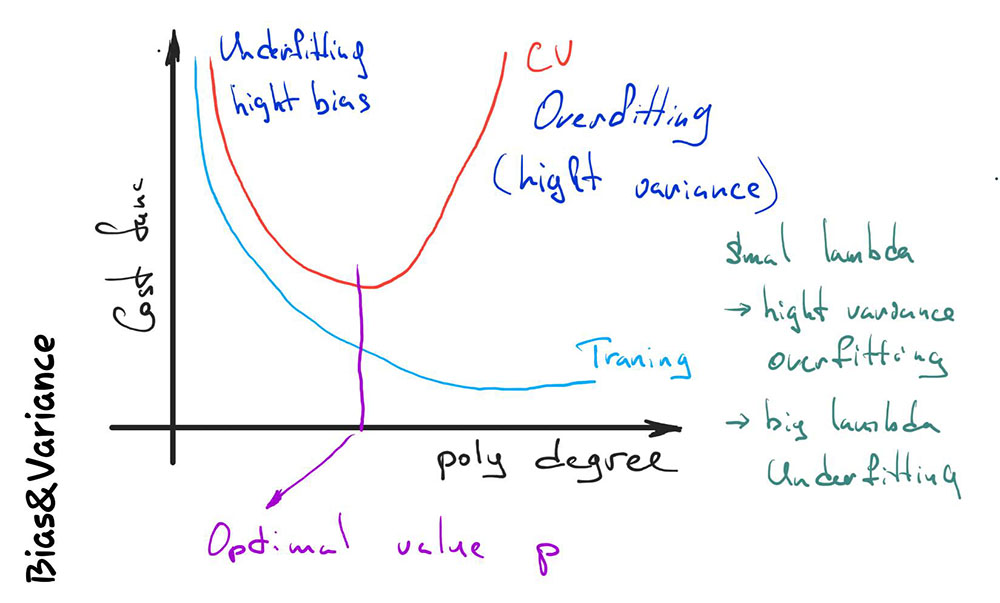

In [0]:
Image(filename=img2)

**Bias&variance**

**Отклонение&дисперсия**

Важной концепцией в машинном обучении является компромисс между отклонениями и десперсией.

Модели с высоким смещением недостаточно сложны для данных и имеют тенденцию к недостаточному соответствию, в то время как модели с высокой дисперсией подходят для тренировочных данных.

Bias-variance
An important concept in machine learning is the bias-variance tradeoff. Models with high bias are not complex enough for the data and tend to underfit, while models with high variance overfit to the training data.

In [0]:
#return for dia
data = load_diabetes()
y = data.target
X = data.data
X = np.concatenate((np.ones((X.shape[0], 1)), X), axis = 1)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=2)

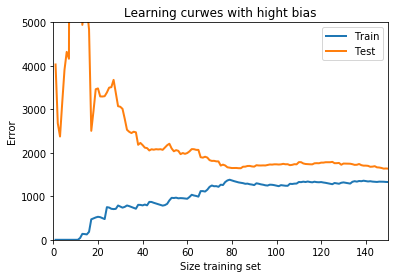

In [0]:
error_train = np.zeros(X.shape[0])
error_val   = np.zeros(X.shape[0])

for i in range(X_train.shape[0]):
  theta = cost_optimize(regcost,  X_train[:i+1], y_train[:i+1], lambda_=0)
  error_train[i] = regcost(theta, X_train[:i+1], y_train[:i+1], lambda_=0)
  error_val[i] = regcost(theta, X_test, y_test, lambda_=0)

plt.plot(np.arange(1, X_train.shape[0]+1), error_train, np.arange(1, X_train.shape[0]+1), error_val, lw=2)
plt.xlim(0, 150)
plt.ylim(0, 5000)
plt.ylabel('Error')
plt.xlabel('Size training set')
plt.legend(['Train', 'Test'])
plt.title('Learning curves with high bias')
plt.show()

#### Find best lambda

In [0]:
def curves(X_train, X_test, y_train, y_test, lambda_find):
  """
  plot Learning Curve, find best lambda(reg)
  Param:
  -----
  X_train, test, y_train, test: slit data
  lambda_find: array, values for find reg
  """  
  error_train = np.zeros(len(lambda_find))
  error_val = np.zeros(len(lambda_find))
  for i in range(len(lambda_find)):
    lambda_ = lambda_find[i]
    theta = cost_optimize(regcost,  X_train, y_train, lambda_)
    error_train[i] = regcost(theta, X_train, y_train, lambda_)
    error_val[i] = regcost(theta, X_test, y_test, lambda_)

  plt.plot(np.arange(1, len(lambda_find)+1), error_train, np.arange(1, len(lambda_find)+1), error_val, lw=2)
  plt.ylabel('Error')
  plt.xlabel('Index lambda in lambda_find')
  plt.legend(['Train', 'Test'])
  plt.title('Number lambda')
  plt.show()


In [0]:
#make poly
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(5, include_bias=False).fit_transform(X) 
poly.shape

(442, 4367)

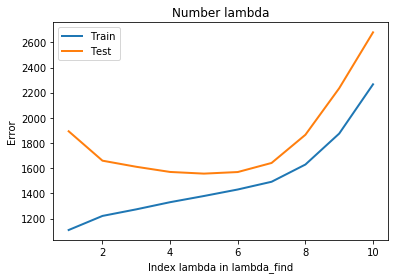

Best lambda idx 5:  0.1


In [0]:
X_train, X_test, y_train, y_test = train_test_split(poly, y, test_size=0.33, random_state=2)
lambda_find = [0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10]
curves(X_train, X_test, y_train, y_test, lambda_find)
print('Best lambda idx 5: ', lambda_find[5])

#### LCurves

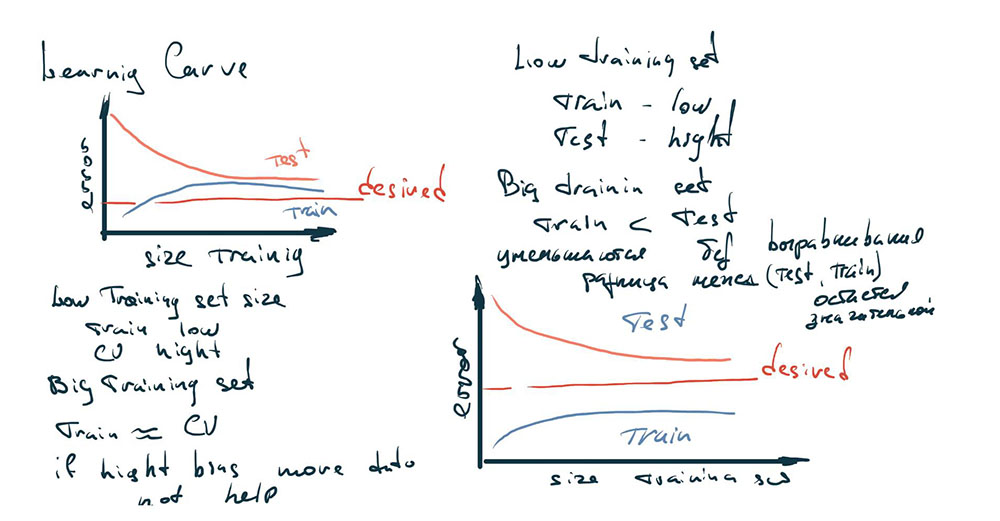

In [0]:
Image(filename=img1)

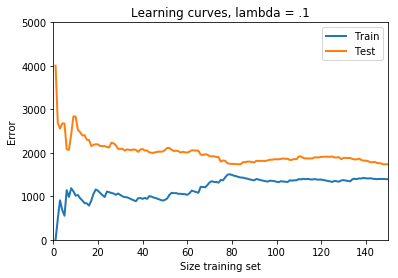

In [0]:
error_train = np.zeros(X_train.shape[0])
error_val   = np.zeros(X_train.shape[0])

for i in range(X_train.shape[0]):
  theta = cost_optimize(regcost,  X_train[:i+1], y_train[:i+1], lambda_=.1)
  error_train[i] = regcost(theta, X_train[:i+1], y_train[:i+1], lambda_=.1)
  error_val[i] = regcost(theta, X_test, y_test, lambda_=.1)

plt.plot(np.arange(1, X_train.shape[0]+1), error_train, np.arange(1, X_train.shape[0]+1), error_val, lw=2)
plt.xlim(0, 150)
plt.ylim(0, 5000)
plt.ylabel('Error')
plt.xlabel('Size training set')
plt.legend(['Train', 'Test'])
plt.title('Learning curves, lambda = .1')
plt.show()


**Our decision process can be broken down as follows:**

Getting more training examples: Fixes high variance

(Получение большего количества обучающих примеров: исправляет высокую дисперсию)

Trying smaller sets of features: Fixes high variance

Попытка меньшего набора функций: исправляет высокую дисперсию

Adding features: Fixes high bias

Добавление функций: исправляет высокий уклон

Adding polynomial features: Fixes high bias

Добавление полиномиальных функций: исправляет высокий уклон

Decreasing λ: Fixes high bias

Уменьшение λ: исправление высокого смещения

Increasing λ: Fixes high variance.

Увеличение λ: исправляет высокую дисперсию.

**Diagnosing Neural Networks**

A neural network with fewer parameters is prone to underfitting. It is also computationally cheaper.

A large neural network with more parameters is prone to overfitting. It is also computationally expensive. In this case you can use regularization (increase λ) to address the overfitting.

Using a single hidden layer is a good starting default. You can train your neural network on a number of hidden layers using your cross validation set. You can then select the one that performs best.

Большая нейронная сеть с большим количеством параметров склонна к переобучению. Это также вычислительно дорого. В этом случае вы можете использовать регуляризацию (увеличение λ) для решения проблемы переоснащения.
Использование одного скрытого слоя является хорошим начальным значением по умолчанию. Вы можете обучить свою нейронную сеть на нескольких скрытых слоях, используя свой набор перекрестной проверки. Затем вы можете выбрать тот, который работает лучше всего.

**Model Complexity Effects:**

Lower-order polynomials (low model complexity) have high bias and low variance. In this case, the model fits poorly consistently.

Higher-order polynomials (high model complexity) fit the training data extremely well and the test data extremely poorly. These have low bias on the training data, but very high variance.

Полиномы низшего порядка (низкая сложность модели) имеют высокое смещение и низкую дисперсию. В этом случае модель подходит плохо последовательно.

Полиномы высшего порядка (высокая сложность модели) очень хорошо вписываются в обучающие данные, а данные испытаний - в крайне плохие

Они имеют низкую систематическую ошибку в данных обучения, но очень высокую дисперсию.

**В действительности, мы хотели бы выбрать модель где-то посередине, которая может хорошо обобщать, но также достаточно хорошо вписывается в данные.**

#### Plotting learning curves with randomly selected examples


На практике, особенно для небольших обучающих наборов, когда вы строите кривые обучения для отладки ваших алгоритмов, часто бывает полезно усреднить несколько наборов случайно выбранных примеров, чтобы определить ошибку обучения и ошибку перекрестной проверки.

Конкретно, чтобы определить ошибку обучения и ошибку перекрестной проверки для i примеров, сначала следует случайным образом выбрать i примеров из обучающего набора и i примеров из набора перекрестной проверки. Затем вы изучите параметры θ, используя случайно выбранный обучающий набор, и оцените параметры θ на случайно выбранном обучающем наборе и наборе перекрестной проверки. 

Вышеприведенные шаги должны затем повторяться несколько раз (скажем, 50), и усредненная ошибка должна использоваться для определения ошибки обучения и ошибки перекрестной проверки для примеров.

In [0]:
lambda_ =.1
error_train = np.zeros(50)
error_test = np.zeros(50)
error_train_mean = np.zeros(X_train.shape[0])
error_test_mean = np.zeros(X_train.shape[0])

lenght = np.arange(X.shape[0])
ch = np.random.choice(lenght)

for n in range(X_train.shape[0]): 
  theta = cost_optimize(regcost,  X_train[:n+1], y_train[:n+1], lambda_)
  for i in range(50):#and each examples  random split
    rand = np.random.choice(X_train.shape[0])
    """
    небольшлй пример как это все работает:
    у нас есть данные 50*10
    n - это значения до 50, отсюда при каждом проходе мы как бы нарезаем данные
    :1,:10...... :n тем самым увеличивае количество данных и мы можем видеть ошибук на каждом этапе

    значения теты(не рандомные) и используем для получения результата(ошибки) на тестовых данных
    в этой функции мы добавили возможность рандомно брать эти отрезки    
    """  
    error_train[i] = regcost(theta, X_train[:rand+1], y_train[:rand+1], lambda_)
    error_test[i] = regcost(theta, X_test[:rand+1], y_test[:rand+1], lambda_)
  error_test_mean[n] = error_test.mean()
  error_train_mean[n] = error_train.mean()

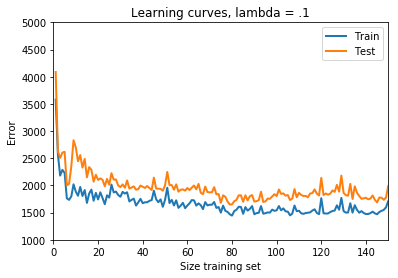

In [0]:
plt.plot(np.arange(1, X_train.shape[0]+1), error_train_mean, np.arange(1, X_train.shape[0]+1), error_test_mean, lw=2)
plt.xlim(0, 150)
plt.ylim(1000, 5000)
plt.ylabel('Error')
plt.xlabel('Size training set')
plt.legend(['Train', 'Test'])
plt.title('Learning curves, random')
plt.show()